# Postdam PM2.5 Deep Learning Forecasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
#pip install tensorflow==2.15.0

In [2]:
#pip install keras-tuner==1.4.6 

In [3]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [4]:
import model_base as mb
import deep_learning as dl

## Data Exploration

* Load Data


In [5]:
df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()

# Deep Neural Network (DNN)

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00014014488528467923, 'num_layers': 3, 'units': [448, 256, 160], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10


2024-02-14 01:55:29.778857: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro


1643/1643 [==============================] - ETA: 0s - loss: 0.0088 - mean_absolute_error: 0.0627INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 11s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0627 - val_loss: 0.0020 - val_mean_absolute_error: 0.0311
Epoch 2/10
1642/1643 [============================>.] - ETA: 0s - loss: 0.0025 - mean_absolute_error: 0.0354INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0354 - val_loss: 0.0015 - val_mean_absolute_error: 0.0256
Epoch 3/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0288 - val_loss: 0.0016 - val_mean_absolute_error: 0.0251
Epoch 4/10
1637/1643 [============================>.] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0247INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 11s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0247 - val_loss: 0.0014 - val_mean_absolute_error: 0.0231
Epoch 5/10
1641/1643 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0222INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0222 - val_loss: 0.0012 - val_mean_absolute_error: 0.0202
Epoch 6/10
1640/1643 [============================>.] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0201INFO:tensorflow:Assets written to: dnn_model_H/assets


INFO:tensorflow:Assets written to: dnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0201 - val_loss: 0.0011 - val_mean_absolute_error: 0.0187
Epoch 7/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0188 - val_loss: 0.0013 - val_mean_absolute_error: 0.0223
Epoch 8/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0179 - val_loss: 0.0012 - val_mean_absolute_error: 0.0205
Epoch 9/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0171 - val_loss: 0.0012 - val_mean_absolute_error: 0.0206
Epoch 10/10
1643/1643 [==============================] - 10s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0162 - val_loss: 0.0013 - val_mean_absolute_error: 0.0214
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)     

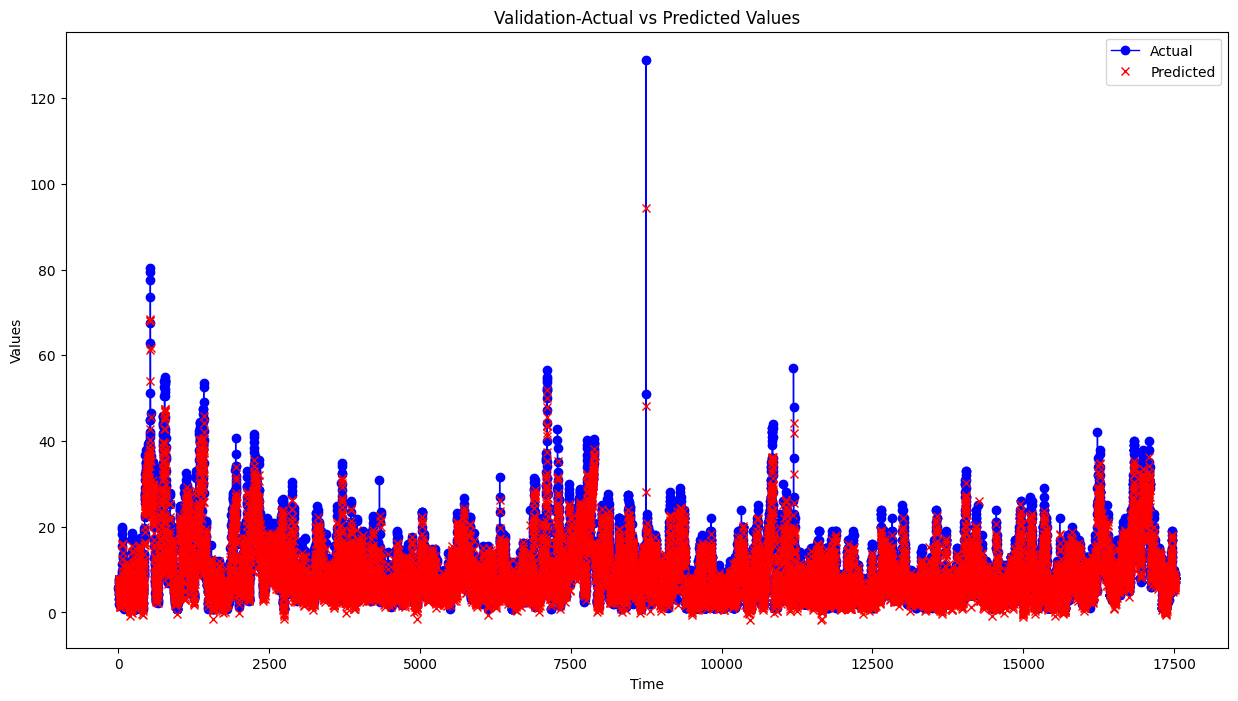

MAE: 1.6384
MSE: 6.1081
RMSE: 2.4715
MAPE: 0.2991
Bias: 0.7711
MASE: 1.2798691245821796
548/548 [==============================] - 1s 2ms/step


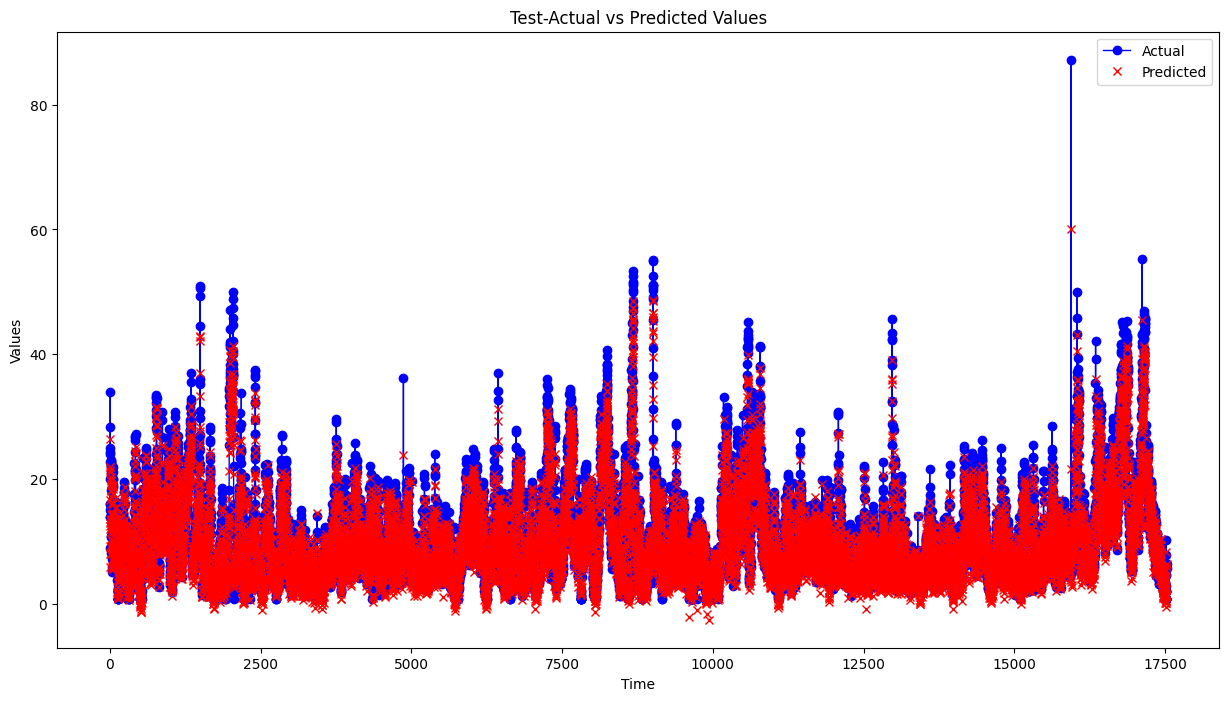

MAE: 1.6739
MSE: 5.8633
RMSE: 2.4214
MAPE: 0.4130
Bias: 0.8557
MASE: 1.3137019975476272
Model saved to dnn_model_H.pkl
{'Total Data Points': 3652, 'Training Data Size': 2176, 'Validation Data Size': 725, 'Testing Data Size': 726}
{'learning_rate': 0.0005906296261520694, 'num_layers': 5, 'units': [224, 32, 96, 32, 160], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
61/68 [=========================>....] - ETA: 0s - loss: 0.0414 - mean_absolute_error: 0.1486INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 2s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.1438 - val_loss: 0.0100 - val_mean_absolute_error: 0.0707
Epoch 2/10
66/68 [============================>.] - ETA: 0s - loss: 0.0149 - mean_absolute_error: 0.0905INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0147 - mean_absolute_error: 0.0902 - val_loss: 0.0075 - val_mean_absolute_error: 0.0597
Epoch 3/10
66/68 [============================>.] - ETA: 0s - loss: 0.0117 - mean_absolute_error: 0.0791INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0790 - val_loss: 0.0069 - val_mean_absolute_error: 0.0555
Epoch 4/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0104 - mean_absolute_error: 0.0729INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 13ms/step - loss: 0.0103 - mean_absolute_error: 0.0726 - val_loss: 0.0056 - val_mean_absolute_error: 0.0486
Epoch 5/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0688 - val_loss: 0.0057 - val_mean_absolute_error: 0.0497
Epoch 6/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0660 - val_loss: 0.0058 - val_mean_absolute_error: 0.0510
Epoch 7/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0642 - val_loss: 0.0063 - val_mean_absolute_error: 0.0530
Epoch 8/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0079 - mean_absolute_error: 0.0618INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 11ms/step - loss: 0.0079 - mean_absolute_error: 0.0617 - val_loss: 0.0056 - val_mean_absolute_error: 0.0485
Epoch 9/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0076 - mean_absolute_error: 0.0595INFO:tensorflow:Assets written to: dnn_model_D/assets


INFO:tensorflow:Assets written to: dnn_model_D/assets


68/68 [==============================] - 1s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0596 - val_loss: 0.0052 - val_mean_absolute_error: 0.0457
Epoch 10/10
68/68 [==============================] - 1s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0595 - val_loss: 0.0056 - val_mean_absolute_error: 0.0489
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 216)               0         
                                                                 
 dense_4 (Dense)             (None, 224)               48608     
                                                                 
 dense_5 (Dense)             (None, 32)                7200      
                                                                 
 dense_6 (Dense)             (None, 96)                3168      
                                                                 
 de

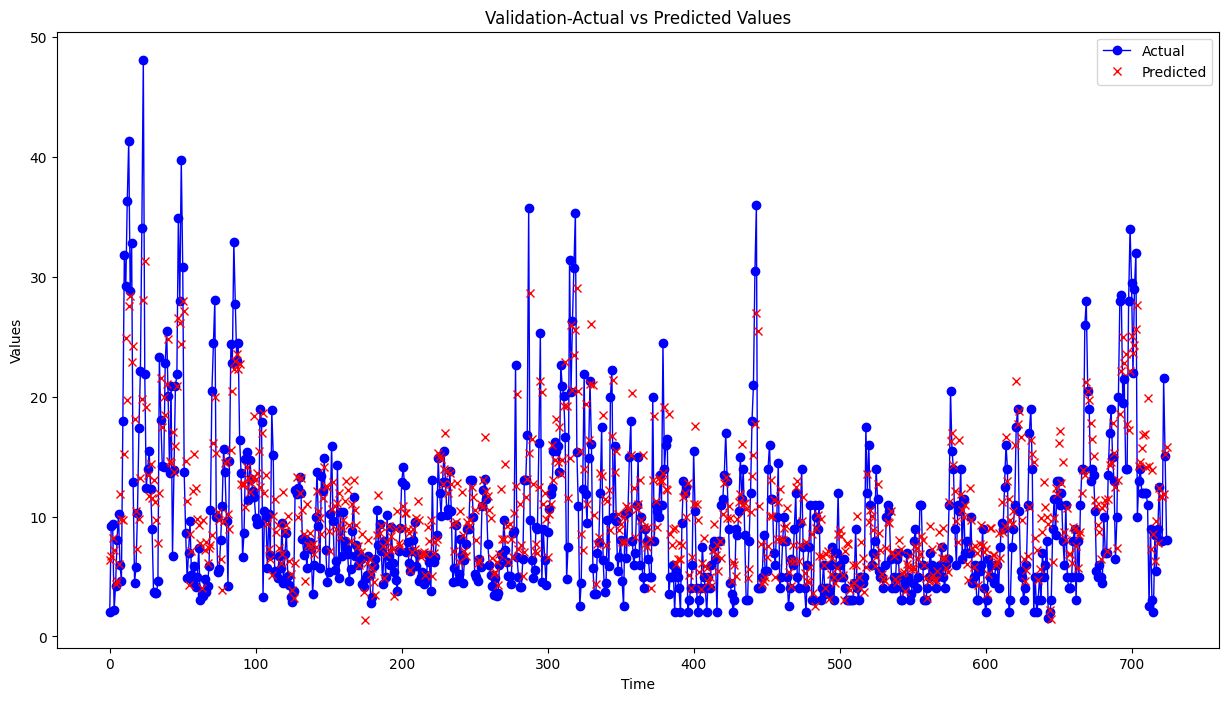

MAE: 3.7435
MSE: 25.8823
RMSE: 5.0875
MAPE: 0.3549
Bias: -1.0283
MASE: 1.3705391472350057
23/23 [==============================] - 0s 2ms/step


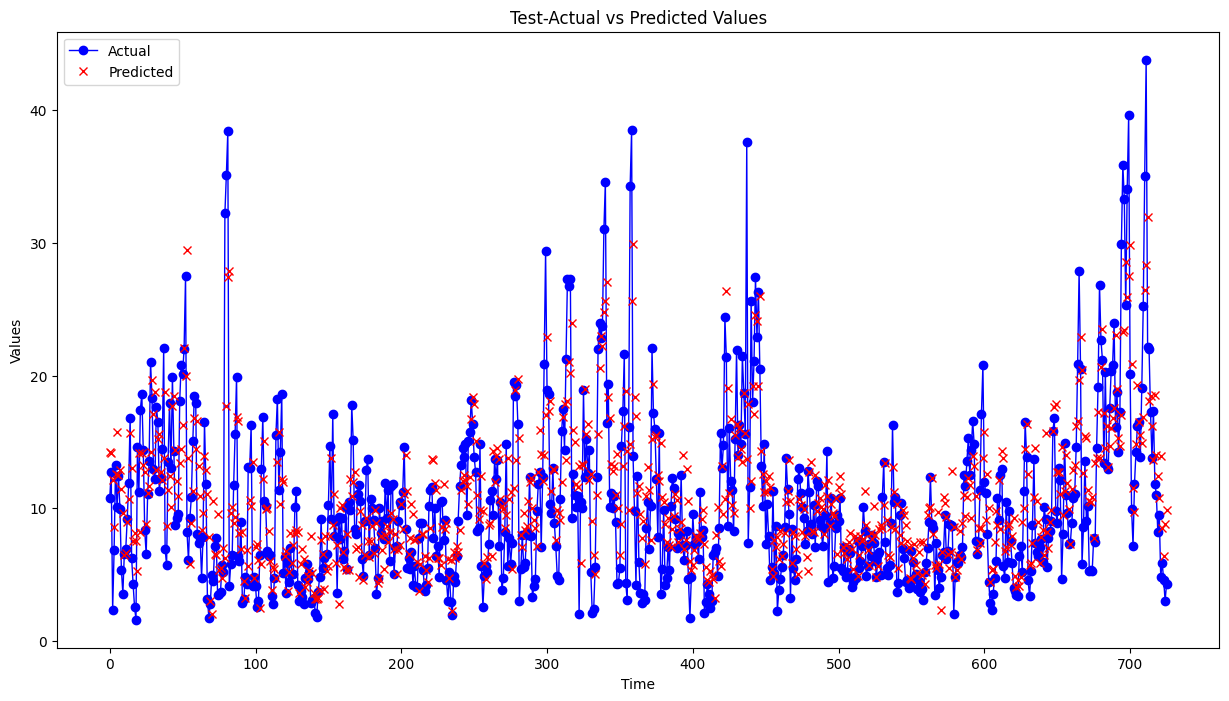

MAE: 3.5460
MSE: 23.4641
RMSE: 4.8440
MAPE: 0.3447
Bias: -0.5479
MASE: 1.3436231268808128
Model saved to dnn_model_D.pkl
{'Total Data Points': 522, 'Training Data Size': 298, 'Validation Data Size': 99, 'Testing Data Size': 100}
{'learning_rate': 0.0004077726925804003, 'num_layers': 4, 'units': [352, 32, 32, 32], 'activations': ['tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}
Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.0810 - mean_absolute_error: 0.2193INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 1s 66ms/step - loss: 0.0810 - mean_absolute_error: 0.2193 - val_loss: 0.0597 - val_mean_absolute_error: 0.1909
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.0347 - mean_absolute_error: 0.1467INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 1s 65ms/step - loss: 0.0347 - mean_absolute_error: 0.1467 - val_loss: 0.0328 - val_mean_absolute_error: 0.1362
Epoch 3/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0240 - mean_absolute_error: 0.1190INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 44ms/step - loss: 0.0239 - mean_absolute_error: 0.1190 - val_loss: 0.0326 - val_mean_absolute_error: 0.1387
Epoch 4/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0193 - mean_absolute_error: 0.1052INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 52ms/step - loss: 0.0196 - mean_absolute_error: 0.1056 - val_loss: 0.0262 - val_mean_absolute_error: 0.1222
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0170 - mean_absolute_error: 0.0974 - val_loss: 0.0276 - val_mean_absolute_error: 0.1257
Epoch 6/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.0135 - mean_absolute_error: 0.0821INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 51ms/step - loss: 0.0151 - mean_absolute_error: 0.0898 - val_loss: 0.0239 - val_mean_absolute_error: 0.1149
Epoch 7/10
 8/10 [=======================>......] - ETA: 0s - loss: 0.0142 - mean_absolute_error: 0.0868INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 1s 61ms/step - loss: 0.0141 - mean_absolute_error: 0.0862 - val_loss: 0.0233 - val_mean_absolute_error: 0.1131
Epoch 8/10
10/10 [==============================] - 0s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0822 - val_loss: 0.0242 - val_mean_absolute_error: 0.1159
Epoch 9/10
 8/10 [=======================>......] - ETA: 0s - loss: 0.0132 - mean_absolute_error: 0.0816INFO:tensorflow:Assets written to: dnn_model_W/assets


INFO:tensorflow:Assets written to: dnn_model_W/assets


10/10 [==============================] - 0s 47ms/step - loss: 0.0128 - mean_absolute_error: 0.0806 - val_loss: 0.0217 - val_mean_absolute_error: 0.1064
Epoch 10/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0793 - val_loss: 0.0220 - val_mean_absolute_error: 0.1087
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 216)               0         
                                                                 
 dense_10 (Dense)            (None, 352)               76384     
                                                                 
 dense_11 (Dense)            (None, 32)                11296     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 d

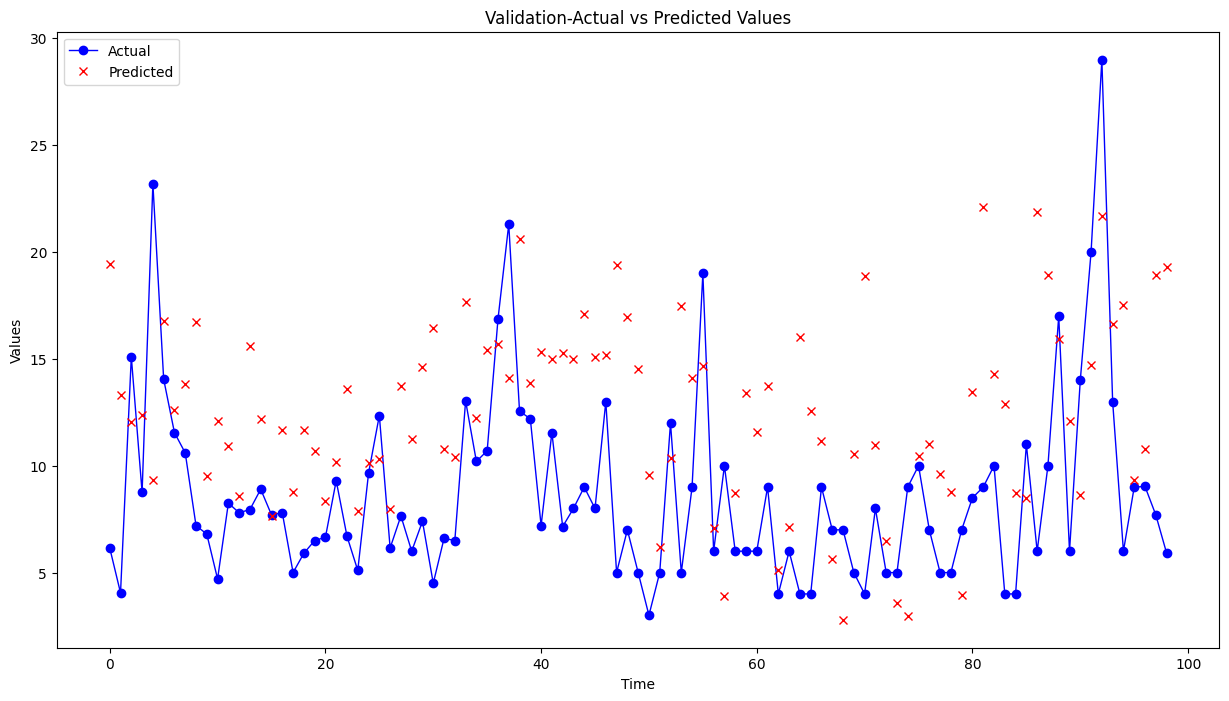

MAE: 5.3765
MSE: 43.5246
RMSE: 6.5973
MAPE: 0.4387
Bias: -3.8194
MASE: 1.4118798620907822
4/4 [==============================] - 0s 7ms/step


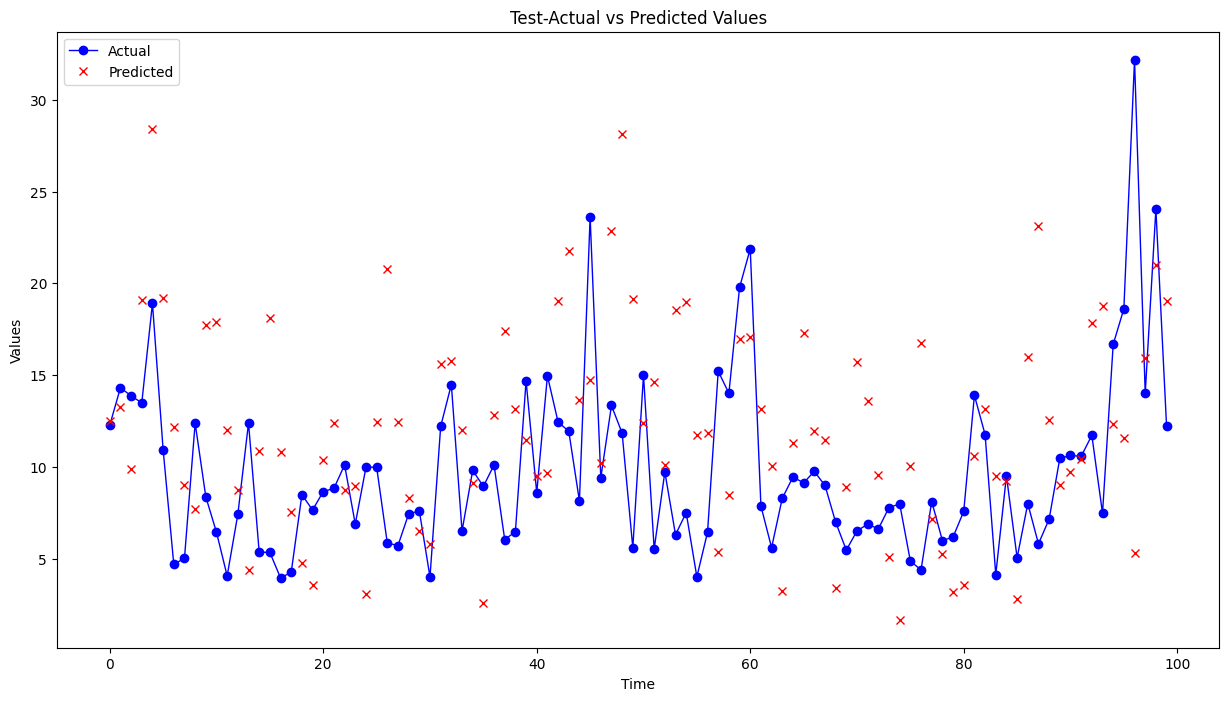

MAE: 5.5699
MSE: 50.2451
RMSE: 7.0884
MAPE: 0.5726
Bias: -2.3535
MASE: 1.1344869819648464
Model saved to dnn_model_W.pkl
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0040835753251513085, 'num_layers': 2, 'units': [32, 32], 'activations': ['tanh', 'tanh'], 'dropout': False}
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.4485 - mean_absolute_error: 0.4969INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 1s 368ms/step - loss: 0.3123 - mean_absolute_error: 0.4184 - val_loss: 0.1104 - val_mean_absolute_error: 0.2625
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 0.1137 - mean_absolute_error: 0.2753 - val_loss: 0.1116 - val_mean_absolute_error: 0.2749
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0844 - mean_absolute_error: 0.2379INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 1s 502ms/step - loss: 0.0791 - mean_absolute_error: 0.2297 - val_loss: 0.1039 - val_mean_absolute_error: 0.2751
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0768 - mean_absolute_error: 0.2322INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 220ms/step - loss: 0.0759 - mean_absolute_error: 0.2283 - val_loss: 0.0880 - val_mean_absolute_error: 0.2412
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0691 - mean_absolute_error: 0.2138INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 247ms/step - loss: 0.0615 - mean_absolute_error: 0.1967 - val_loss: 0.0641 - val_mean_absolute_error: 0.2081
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0491 - mean_absolute_error: 0.1686INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 252ms/step - loss: 0.0499 - mean_absolute_error: 0.1751 - val_loss: 0.0495 - val_mean_absolute_error: 0.1831
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0442 - mean_absolute_error: 0.1617INFO:tensorflow:Assets written to: dnn_model_M/assets


INFO:tensorflow:Assets written to: dnn_model_M/assets


2/2 [==============================] - 0s 234ms/step - loss: 0.0442 - mean_absolute_error: 0.1633 - val_loss: 0.0365 - val_mean_absolute_error: 0.1521
Epoch 8/10
2/2 [==============================] - 0s 21ms/step - loss: 0.0420 - mean_absolute_error: 0.1544 - val_loss: 0.0376 - val_mean_absolute_error: 0.1568
Epoch 9/10
2/2 [==============================] - 0s 22ms/step - loss: 0.0389 - mean_absolute_error: 0.1504 - val_loss: 0.0434 - val_mean_absolute_error: 0.1680
Epoch 10/10
2/2 [==============================] - 0s 23ms/step - loss: 0.0333 - mean_absolute_error: 0.1423 - val_loss: 0.0488 - val_mean_absolute_error: 0.1772
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 108)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                3488      
             

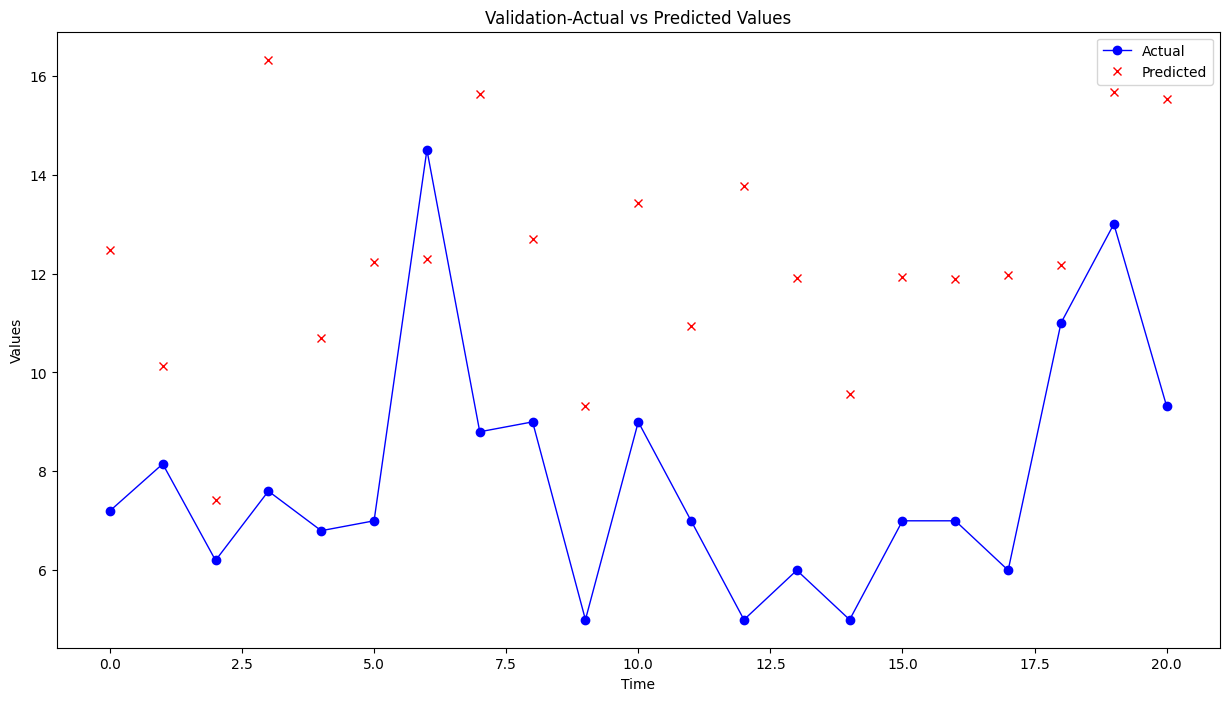

MAE: 4.6108
MSE: 25.4543
RMSE: 5.0452
MAPE: 0.3700
Bias: -4.4002
MASE: 1.8143061685799515
1/1 [==============================] - 0s 18ms/step


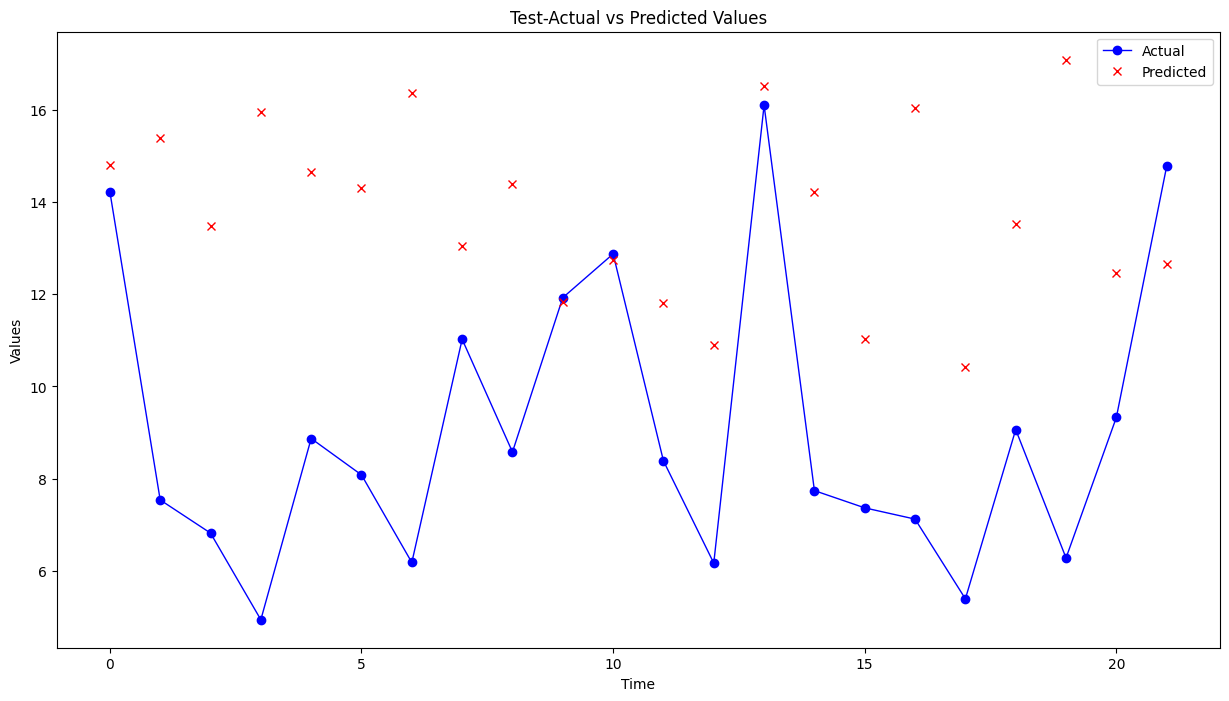

MAE: 4.9815
MSE: 35.7900
RMSE: 5.9825
MAPE: 0.3510
Bias: -4.7681
MASE: 2.017090161511061
Model saved to dnn_model_M.pkl


In [6]:
# # Train and Evolve

# Hourly
dl.dnn_train_and_evaluate(df_hourly)

# Daily
dl.dnn_train_and_evaluate(df_daily, 'D')

# Weekly
dl.dnn_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.dnn_train_and_evaluate(df_monthly, 'M')


# LSTM

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00019153080222192724, 'num_layers': 2, 'units': [448, 224], 'activations': ['tanh', 'tanh'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0057 - mean_absolute_error: 0.0323INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 28s 16ms/step - loss: 0.0057 - mean_absolute_error: 0.0323 - val_loss: 0.0018 - val_mean_absolute_error: 0.0196
Epoch 2/10
1642/1643 [============================>.] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0166INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 26s 16ms/step - loss: 0.0014 - mean_absolute_error: 0.0166 - val_loss: 0.0010 - val_mean_absolute_error: 0.0132
Epoch 3/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0010 - mean_absolute_error: 0.0137INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 27s 17ms/step - loss: 0.0010 - mean_absolute_error: 0.0137 - val_loss: 8.8027e-04 - val_mean_absolute_error: 0.0112
Epoch 4/10
1640/1643 [============================>.] - ETA: 0s - loss: 9.3127e-04 - mean_absolute_error: 0.0126INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 9.3074e-04 - mean_absolute_error: 0.0126 - val_loss: 8.5621e-04 - val_mean_absolute_error: 0.0121
Epoch 5/10
1643/1643 [==============================] - ETA: 0s - loss: 8.6140e-04 - mean_absolute_error: 0.0116INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 8.6140e-04 - mean_absolute_error: 0.0116 - val_loss: 7.7361e-04 - val_mean_absolute_error: 0.0096
Epoch 6/10
1643/1643 [==============================] - ETA: 0s - loss: 8.3205e-04 - mean_absolute_error: 0.0111INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 8.3205e-04 - mean_absolute_error: 0.0111 - val_loss: 7.7126e-04 - val_mean_absolute_error: 0.0094
Epoch 7/10
1643/1643 [==============================] - ETA: 0s - loss: 7.9953e-04 - mean_absolute_error: 0.0106INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


1643/1643 [==============================] - 25s 15ms/step - loss: 7.9953e-04 - mean_absolute_error: 0.0106 - val_loss: 6.9925e-04 - val_mean_absolute_error: 0.0097
Epoch 8/10
1643/1643 [==============================] - 23s 14ms/step - loss: 7.8515e-04 - mean_absolute_error: 0.0101 - val_loss: 7.2530e-04 - val_mean_absolute_error: 0.0087
Epoch 9/10
1643/1643 [==============================] - 24s 15ms/step - loss: 7.7089e-04 - mean_absolute_error: 0.0099 - val_loss: 7.6320e-04 - val_mean_absolute_error: 0.0088
Epoch 10/10
1643/1643 [==============================] - ETA: 0s - loss: 7.5184e-04 - mean_absolute_error: 0.0097INFO:tensorflow:Assets written to: lstm_model_H/assets


INFO:tensorflow:Assets written to: lstm_model_H/assets


548/548 [==============================] - 3s 5ms/step


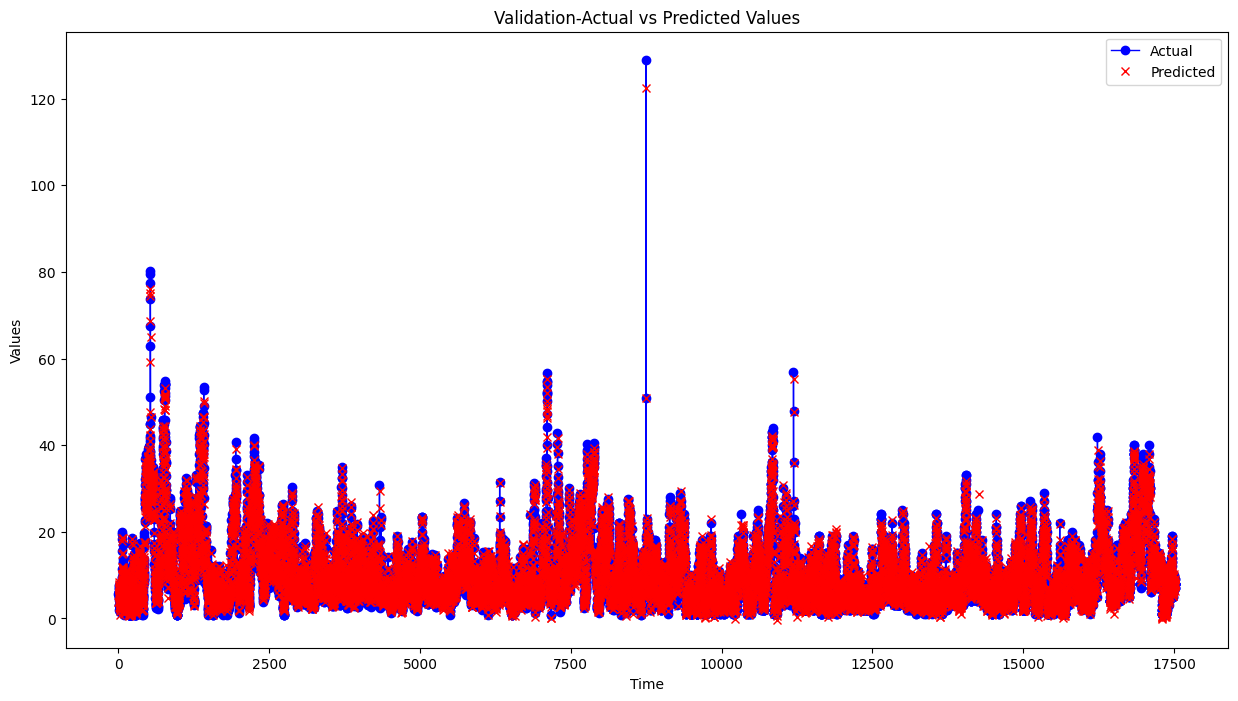

MAE: 1.2074
MSE: 4.0852
RMSE: 2.0212
MAPE: 0.1573
Bias: -0.2709
MASE: 1.0628418372345003
548/548 [==============================] - 2s 4ms/step


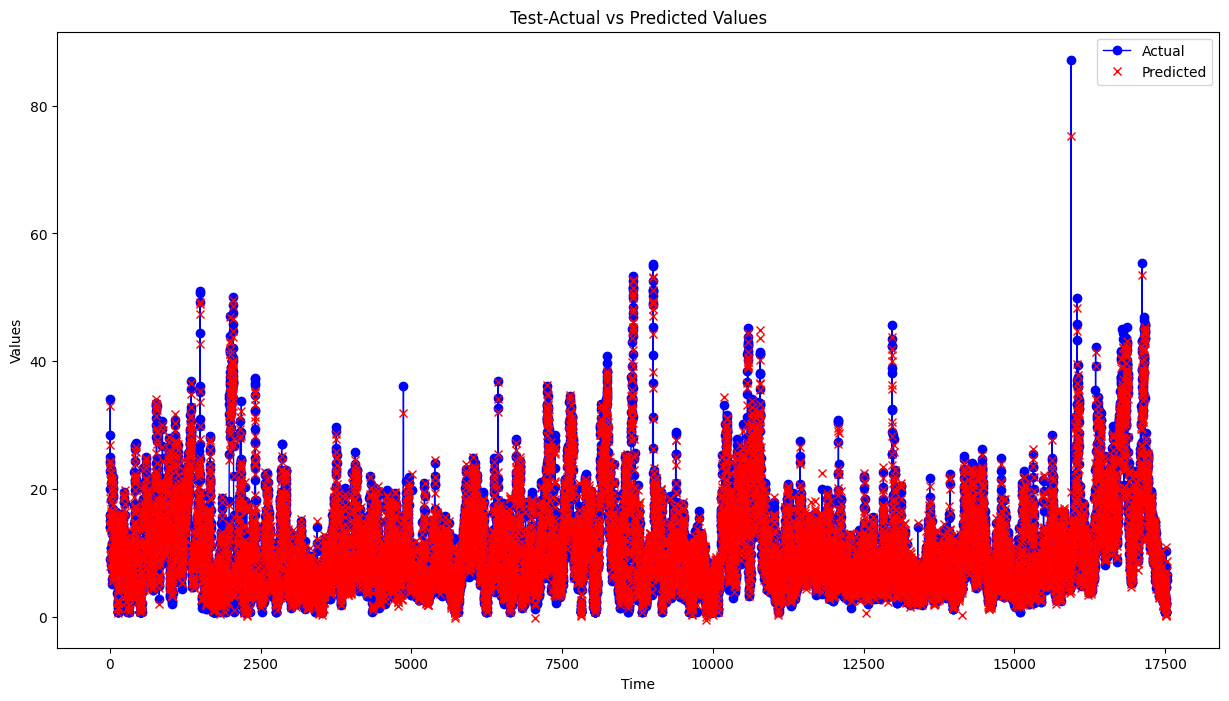

MAE: 1.2057
MSE: 3.6508
RMSE: 1.9107
MAPE: 0.1453
Bias: -0.2664
MASE: 1.053141581512165
Model saved to lstm_model_H.pkl
{'Total Data Points': 3652, 'Training Data Size': 2176, 'Validation Data Size': 725, 'Testing Data Size': 726}
{'learning_rate': 0.0028652697828724623, 'num_layers': 3, 'units': [480, 384, 288], 'activations': ['tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
64/68 [===========================>..] - ETA: 0s - loss: 0.0388 - mean_absolute_error: 0.1246INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 3s 38ms/step - loss: 0.0373 - mean_absolute_error: 0.1218 - val_loss: 0.0114 - val_mean_absolute_error: 0.0687
Epoch 2/10
65/68 [===========================>..] - ETA: 0s - loss: 0.0135 - mean_absolute_error: 0.0756INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0755 - val_loss: 0.0100 - val_mean_absolute_error: 0.0601
Epoch 3/10
68/68 [==============================] - 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0698 - val_loss: 0.0107 - val_mean_absolute_error: 0.0654
Epoch 4/10
68/68 [==============================] - ETA: 0s - loss: 0.0109 - mean_absolute_error: 0.0654INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0654 - val_loss: 0.0087 - val_mean_absolute_error: 0.0559
Epoch 5/10
68/68 [==============================] - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.0601INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0601 - val_loss: 0.0065 - val_mean_absolute_error: 0.0476
Epoch 6/10
68/68 [==============================] - 1s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0579 - val_loss: 0.0065 - val_mean_absolute_error: 0.0491
Epoch 7/10
68/68 [==============================] - 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0565 - val_loss: 0.0073 - val_mean_absolute_error: 0.0483
Epoch 8/10
64/68 [===========================>..] - ETA: 0s - loss: 0.0083 - mean_absolute_error: 0.0565INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 34ms/step - loss: 0.0083 - mean_absolute_error: 0.0565 - val_loss: 0.0065 - val_mean_absolute_error: 0.0477
Epoch 9/10
68/68 [==============================] - ETA: 0s - loss: 0.0078 - mean_absolute_error: 0.0551INFO:tensorflow:Assets written to: lstm_model_D/assets


INFO:tensorflow:Assets written to: lstm_model_D/assets


68/68 [==============================] - 2s 30ms/step - loss: 0.0078 - mean_absolute_error: 0.0551 - val_loss: 0.0058 - val_mean_absolute_error: 0.0470
Epoch 10/10
23/23 [==============================] - 0s 6ms/step


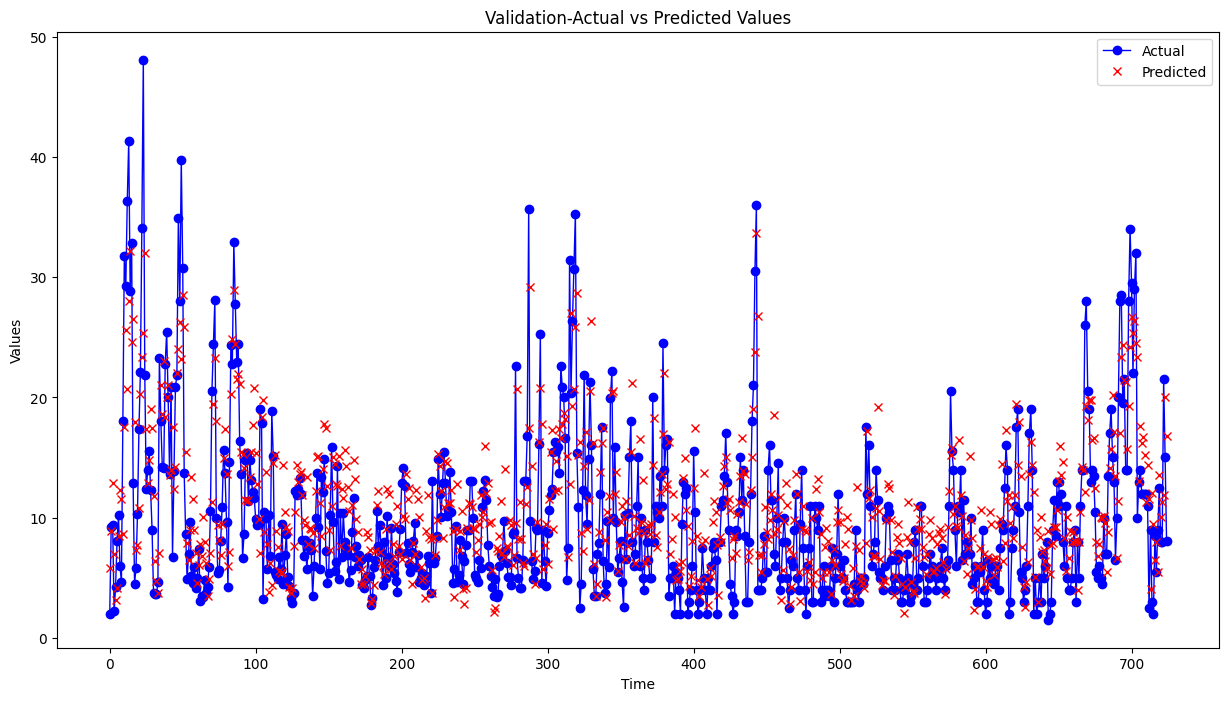

MAE: 3.7993
MSE: 25.9069
RMSE: 5.0899
MAPE: 0.3675
Bias: -1.1585
MASE: 1.1817448646790751
23/23 [==============================] - 0s 6ms/step


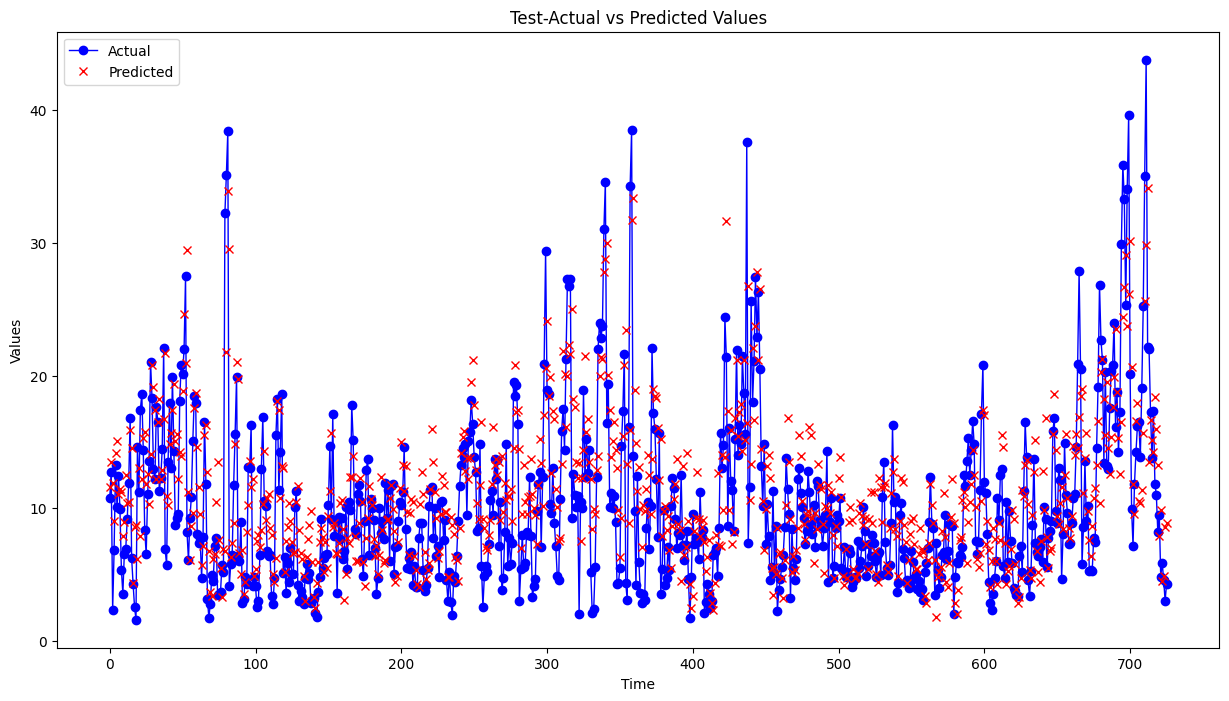

MAE: 3.7006
MSE: 25.1528
RMSE: 5.0153
MAPE: 0.3550
Bias: -0.9708
MASE: 1.208949349711219
Model saved to lstm_model_D.pkl
{'Total Data Points': 522, 'Training Data Size': 298, 'Validation Data Size': 99, 'Testing Data Size': 100}
{'learning_rate': 0.0009513380195031257, 'num_layers': 6, 'units': [480, 160, 64, 224, 512, 384], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.0862 - mean_absolute_error: 0.2143INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 6s 583ms/step - loss: 0.0862 - mean_absolute_error: 0.2143 - val_loss: 0.0626 - val_mean_absolute_error: 0.1990
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.0496 - mean_absolute_error: 0.1641INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 528ms/step - loss: 0.0496 - mean_absolute_error: 0.1641 - val_loss: 0.0499 - val_mean_absolute_error: 0.1757
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.0421 - mean_absolute_error: 0.1533INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 534ms/step - loss: 0.0421 - mean_absolute_error: 0.1533 - val_loss: 0.0493 - val_mean_absolute_error: 0.1688
Epoch 4/10
10/10 [==============================] - 5s 470ms/step - loss: 0.0411 - mean_absolute_error: 0.1488 - val_loss: 0.0512 - val_mean_absolute_error: 0.1753
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.0368 - mean_absolute_error: 0.1423INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 6s 642ms/step - loss: 0.0368 - mean_absolute_error: 0.1423 - val_loss: 0.0410 - val_mean_absolute_error: 0.1499
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.0277 - mean_absolute_error: 0.1282INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 529ms/step - loss: 0.0277 - mean_absolute_error: 0.1282 - val_loss: 0.0267 - val_mean_absolute_error: 0.1204
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.0202 - mean_absolute_error: 0.1075INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 510ms/step - loss: 0.0202 - mean_absolute_error: 0.1075 - val_loss: 0.0251 - val_mean_absolute_error: 0.1222
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.0166 - mean_absolute_error: 0.0977INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 541ms/step - loss: 0.0166 - mean_absolute_error: 0.0977 - val_loss: 0.0241 - val_mean_absolute_error: 0.1154
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.0164 - mean_absolute_error: 0.0969INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 5s 554ms/step - loss: 0.0164 - mean_absolute_error: 0.0969 - val_loss: 0.0230 - val_mean_absolute_error: 0.1130
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.0149 - mean_absolute_error: 0.0915INFO:tensorflow:Assets written to: lstm_model_W/assets


INFO:tensorflow:Assets written to: lstm_model_W/assets


10/10 [==============================] - 6s 578ms/step - loss: 0.0149 - mean_absolute_error: 0.0915 - val_loss: 0.0201 - val_mean_absolute_error: 0.1012


4/4 [==============================] - 0s 45ms/step


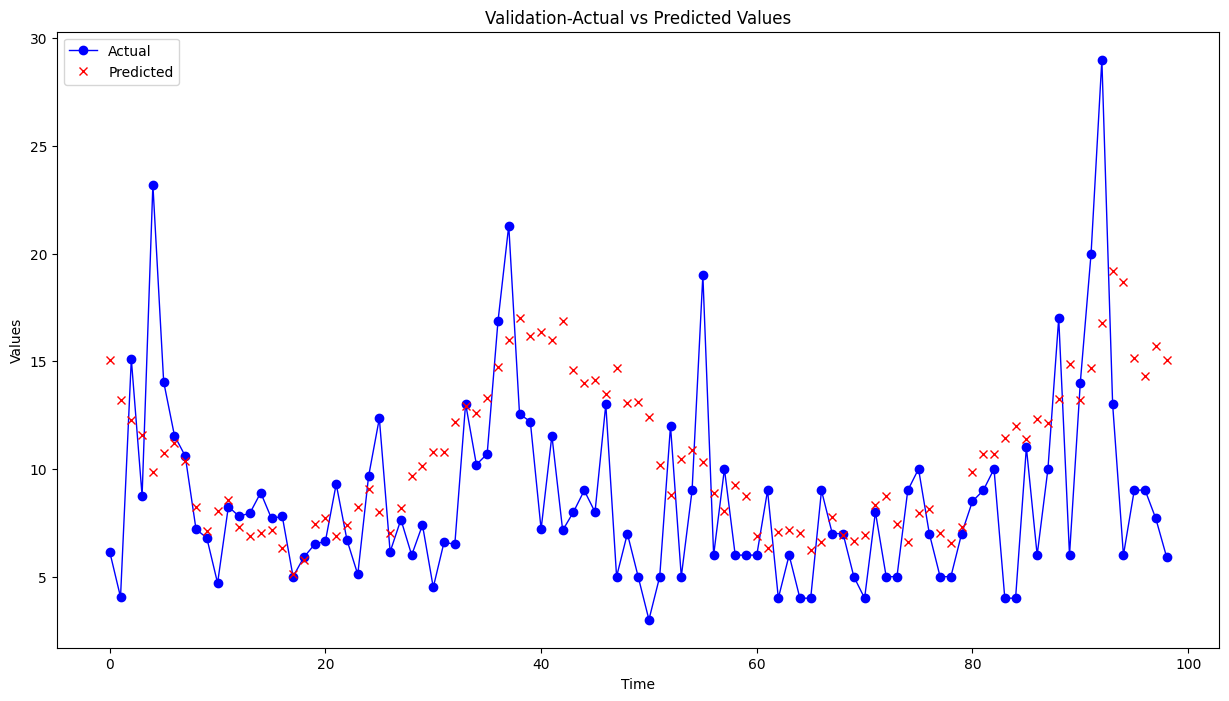

MAE: 3.6670
MSE: 23.4682
RMSE: 4.8444
MAPE: 0.3197
Bias: -1.9292
MASE: 3.8701834986134718
4/4 [==============================] - 0s 60ms/step


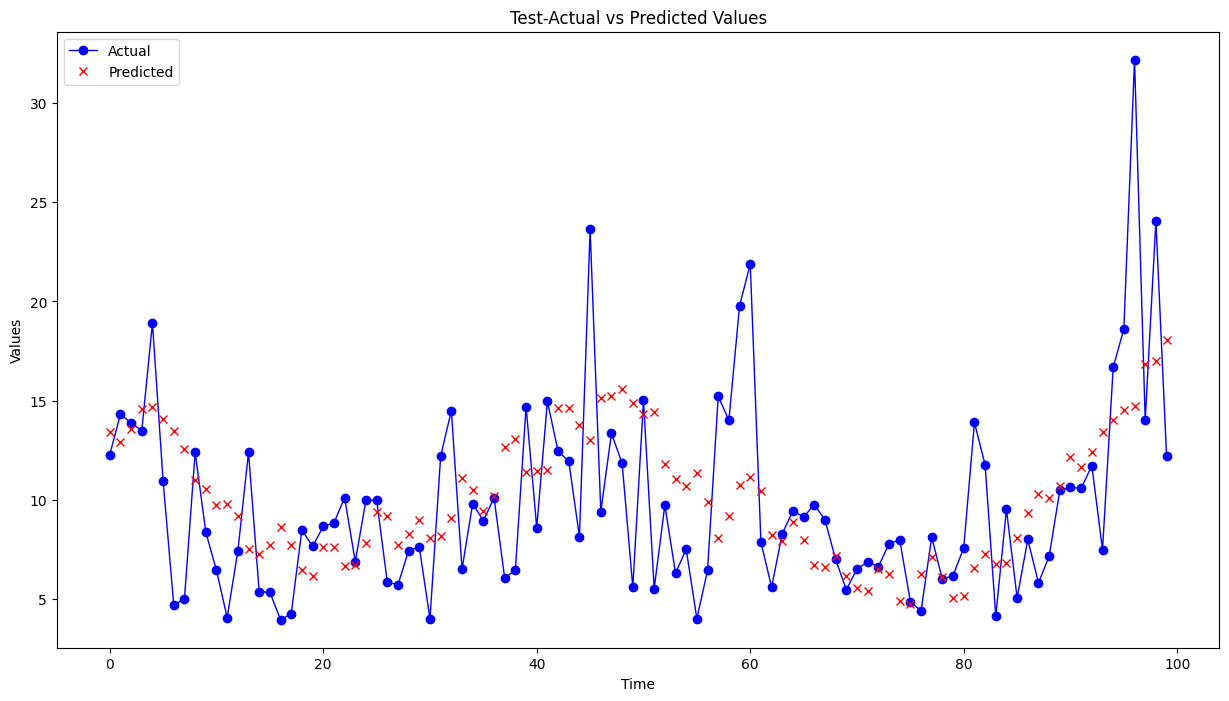

MAE: 3.3080
MSE: 19.2553
RMSE: 4.3881
MAPE: 0.3239
Bias: -0.3356
MASE: 3.9212675630279423
Model saved to lstm_model_W.pkl
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0013383290456424192, 'num_layers': 5, 'units': [288, 352, 480, 224, 192], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': False}


Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 0.1832 - mean_absolute_error: 0.3431INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 2s 1s/step - loss: 0.1832 - mean_absolute_error: 0.3431 - val_loss: 0.1049 - val_mean_absolute_error: 0.2713
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 0.0855 - mean_absolute_error: 0.2350INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 785ms/step - loss: 0.0855 - mean_absolute_error: 0.2350 - val_loss: 0.0782 - val_mean_absolute_error: 0.2121
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 0.0788 - mean_absolute_error: 0.2201INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 782ms/step - loss: 0.0788 - mean_absolute_error: 0.2201 - val_loss: 0.0452 - val_mean_absolute_error: 0.1627
Epoch 4/10
2/2 [==============================] - ETA: 0s - loss: 0.0508 - mean_absolute_error: 0.1769INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 762ms/step - loss: 0.0508 - mean_absolute_error: 0.1769 - val_loss: 0.0425 - val_mean_absolute_error: 0.1719
Epoch 5/10
2/2 [==============================] - ETA: 0s - loss: 0.0488 - mean_absolute_error: 0.1812INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 751ms/step - loss: 0.0488 - mean_absolute_error: 0.1812 - val_loss: 0.0407 - val_mean_absolute_error: 0.1580
Epoch 6/10
2/2 [==============================] - ETA: 0s - loss: 0.0339 - mean_absolute_error: 0.1438INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 911ms/step - loss: 0.0339 - mean_absolute_error: 0.1438 - val_loss: 0.0331 - val_mean_absolute_error: 0.1403
Epoch 7/10
2/2 [==============================] - 0s 136ms/step - loss: 0.0316 - mean_absolute_error: 0.1376 - val_loss: 0.0331 - val_mean_absolute_error: 0.1432
Epoch 8/10
2/2 [==============================] - ETA: 0s - loss: 0.0333 - mean_absolute_error: 0.1404INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 738ms/step - loss: 0.0333 - mean_absolute_error: 0.1404 - val_loss: 0.0323 - val_mean_absolute_error: 0.1425
Epoch 9/10
2/2 [==============================] - 0s 131ms/step - loss: 0.0293 - mean_absolute_error: 0.1319 - val_loss: 0.0378 - val_mean_absolute_error: 0.1534
Epoch 10/10
2/2 [==============================] - ETA: 0s - loss: 0.0261 - mean_absolute_error: 0.1205INFO:tensorflow:Assets written to: lstm_model_M/assets


INFO:tensorflow:Assets written to: lstm_model_M/assets


2/2 [==============================] - 1s 753ms/step - loss: 0.0261 - mean_absolute_error: 0.1205 - val_loss: 0.0305 - val_mean_absolute_error: 0.1341


1/1 [==============================] - 0s 102ms/step


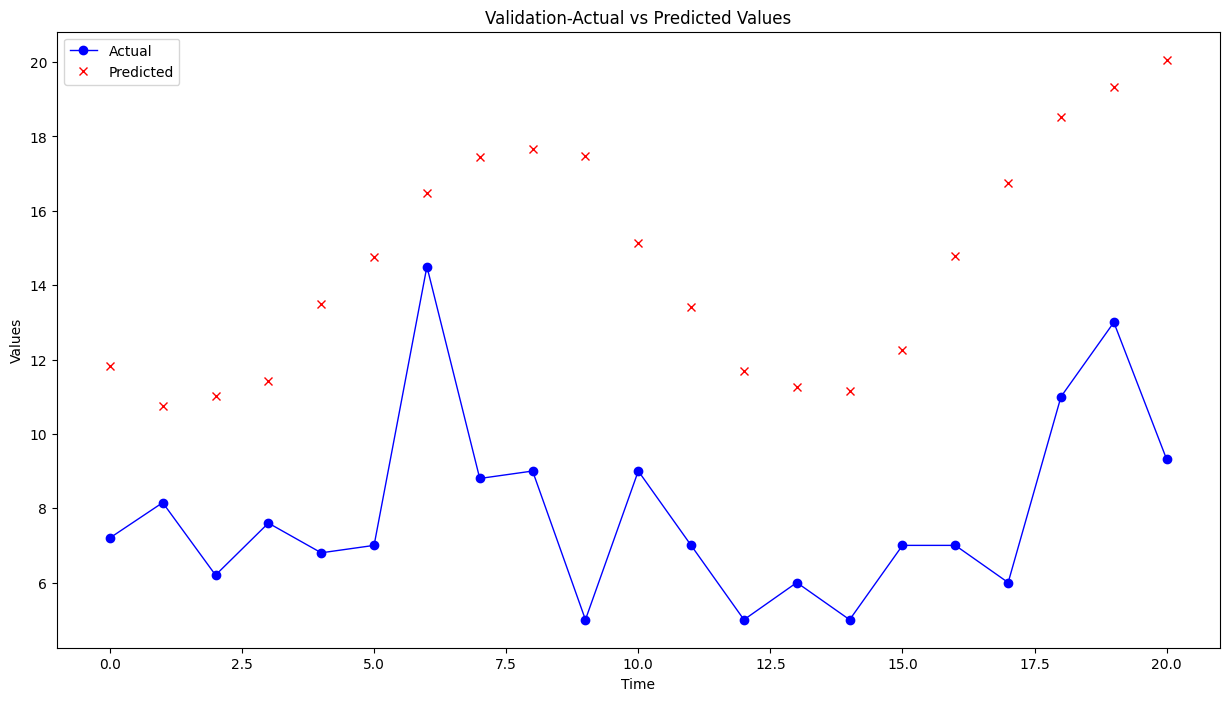

MAE: 6.7224
MSE: 51.7115
RMSE: 7.1911
MAPE: 0.4566
Bias: -6.7224
MASE: 5.736645499316418
1/1 [==============================] - 0s 51ms/step


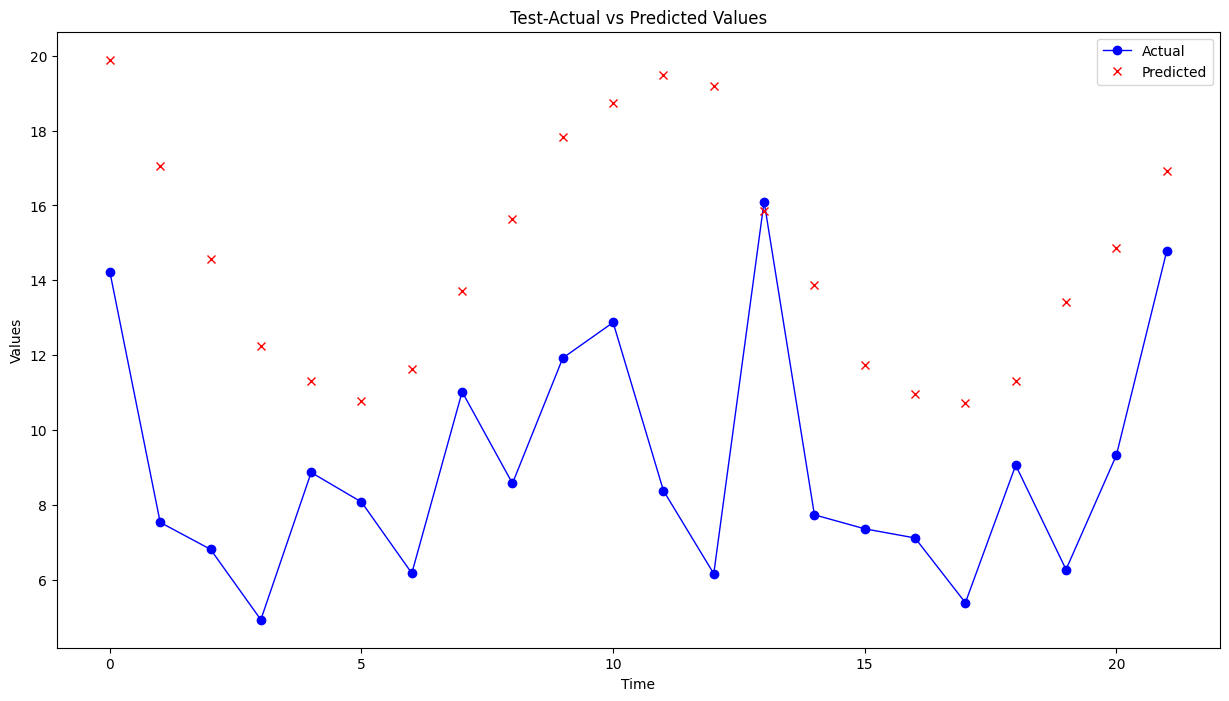

MAE: 5.6104
MSE: 40.4142
RMSE: 6.3572
MAPE: 0.3796
Bias: -5.5865
MASE: 3.5928037023742543
Model saved to lstm_model_M.pkl


In [7]:
# # Train and Evolve

# Hourly
dl.lstm_train_and_evaluate(df_hourly)

# Daily
dl.lstm_train_and_evaluate(df_daily, 'D')

# Weekly
dl.lstm_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.lstm_train_and_evaluate(df_monthly, 'M')


# CNN 

* Best Model Train and Evolve 
* Hyperparamater with Keras-Tuner

{'Total Data Points': 87648, 'Training Data Size': 52573, 'Validation Data Size': 17524, 'Testing Data Size': 17526}
{'learning_rate': 0.00021997838024224393, 'num_layers': 2, 'units': [224, 256], 'activations': ['relu', 'tanh'], 'dropout': False}
Epoch 1/10
1643/1643 [==============================] - ETA: 0s - loss: 0.0022 - mean_absolute_error: 0.0241INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0241 - val_loss: 0.0012 - val_mean_absolute_error: 0.0178
Epoch 2/10
1642/1643 [============================>.] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0163INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0163 - val_loss: 0.0010 - val_mean_absolute_error: 0.0155
Epoch 3/10
1642/1643 [============================>.] - ETA: 0s - loss: 9.4682e-04 - mean_absolute_error: 0.0143INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 9s 6ms/step - loss: 9.4797e-04 - mean_absolute_error: 0.0143 - val_loss: 8.2173e-04 - val_mean_absolute_error: 0.0124
Epoch 4/10
1643/1643 [==============================] - 10s 6ms/step - loss: 8.9400e-04 - mean_absolute_error: 0.0134 - val_loss: 8.2601e-04 - val_mean_absolute_error: 0.0125
Epoch 5/10
1643/1643 [==============================] - 10s 6ms/step - loss: 8.5651e-04 - mean_absolute_error: 0.0127 - val_loss: 8.5888e-04 - val_mean_absolute_error: 0.0130
Epoch 6/10
1643/1643 [==============================] - ETA: 0s - loss: 8.2932e-04 - mean_absolute_error: 0.0123INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 8.2932e-04 - mean_absolute_error: 0.0123 - val_loss: 7.9246e-04 - val_mean_absolute_error: 0.0118
Epoch 7/10
1634/1643 [============================>.] - ETA: 0s - loss: 8.1009e-04 - mean_absolute_error: 0.0118INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 8.0896e-04 - mean_absolute_error: 0.0118 - val_loss: 7.2522e-04 - val_mean_absolute_error: 0.0102
Epoch 8/10
1643/1643 [==============================] - 10s 6ms/step - loss: 7.8791e-04 - mean_absolute_error: 0.0114 - val_loss: 7.5671e-04 - val_mean_absolute_error: 0.0107
Epoch 9/10
1636/1643 [============================>.] - ETA: 0s - loss: 7.7945e-04 - mean_absolute_error: 0.0112INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


1643/1643 [==============================] - 10s 6ms/step - loss: 7.7855e-04 - mean_absolute_error: 0.0112 - val_loss: 7.0077e-04 - val_mean_absolute_error: 0.0097
Epoch 10/10
1641/1643 [============================>.] - ETA: 0s - loss: 7.6510e-04 - mean_absolute_error: 0.0110INFO:tensorflow:Assets written to: cnn_model_H/assets


INFO:tensorflow:Assets written to: cnn_model_H/assets


548/548 [==============================] - 1s 2ms/step


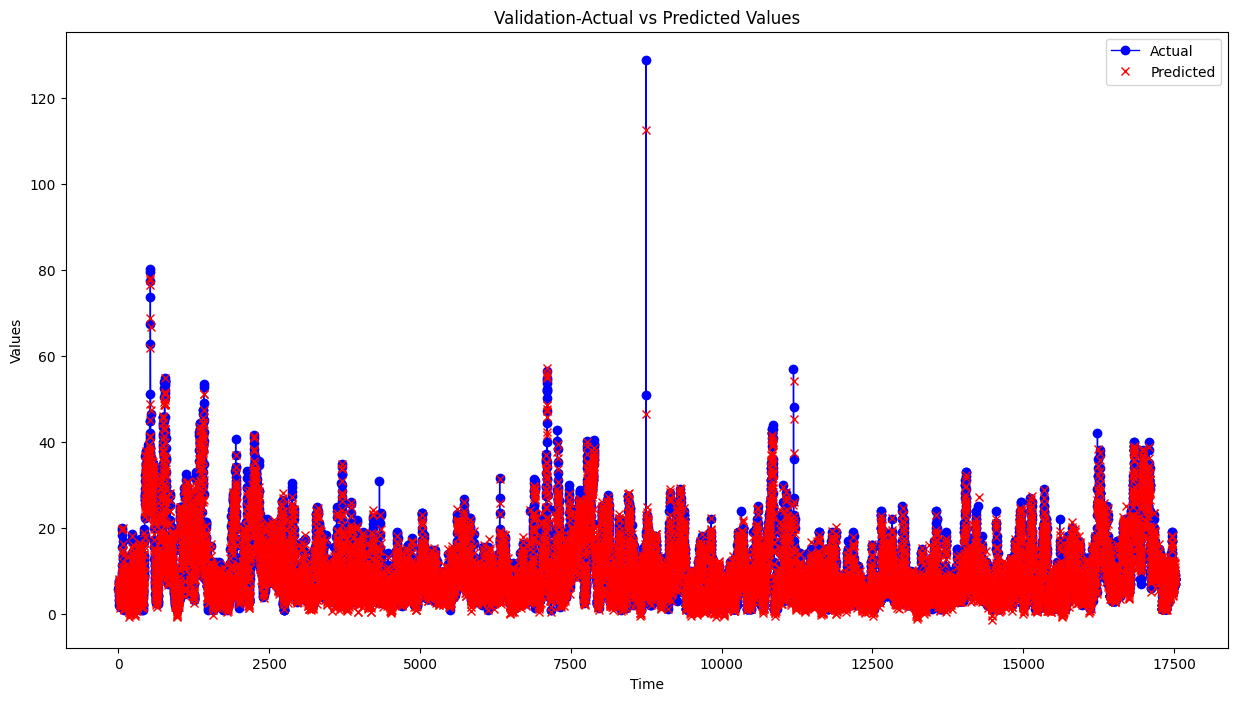

MAE: 1.5035
MSE: 5.1268
RMSE: 2.2642
MAPE: 0.3161
Bias: 0.2064
MASE: 0.9587009730136672
548/548 [==============================] - 1s 2ms/step


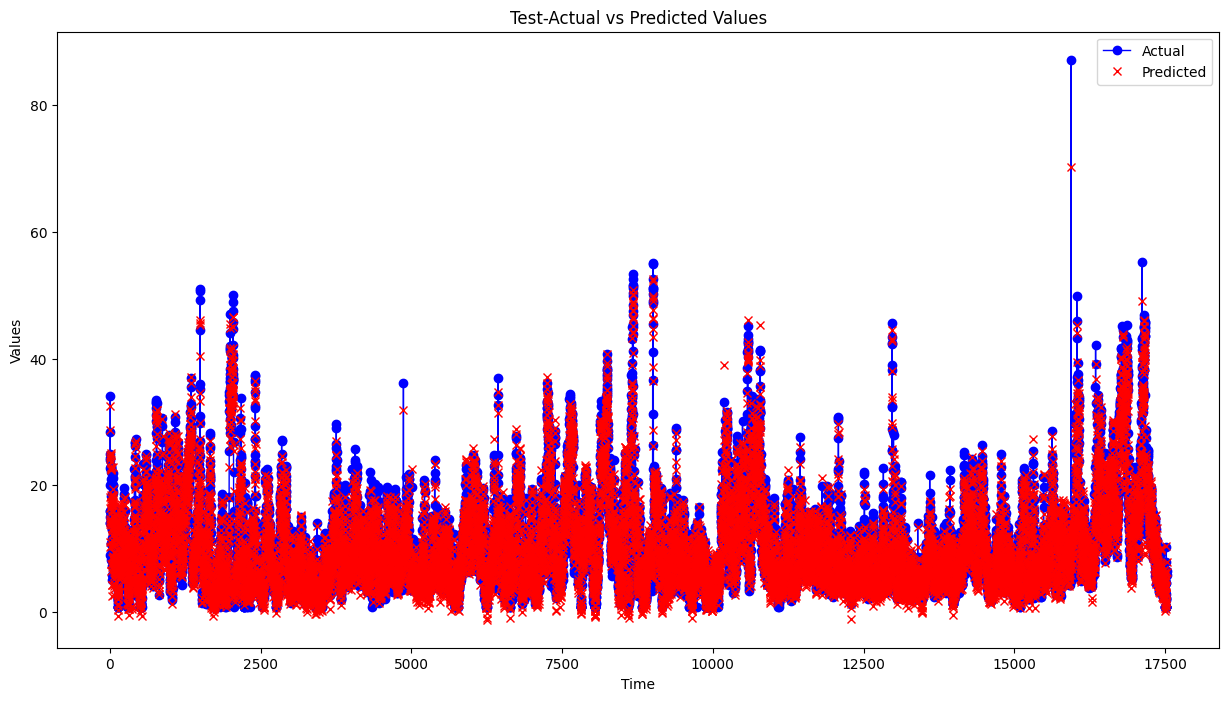

MAE: 1.5318
MSE: 4.9130
RMSE: 2.2165
MAPE: 0.2522
Bias: 0.2247
MASE: 0.988854263219034
Model saved to cnn_model_H.pkl
{'Total Data Points': 3652, 'Training Data Size': 2176, 'Validation Data Size': 725, 'Testing Data Size': 726}
{'learning_rate': 0.0012918827423762096, 'num_layers': 5, 'units': [96, 448, 96, 512, 320], 'activations': ['tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
63/68 [==========================>...] - ETA: 0s - loss: 0.1279 - mean_absolute_error: 0.2344INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 16ms/step - loss: 0.1198 - mean_absolute_error: 0.2245 - val_loss: 0.0119 - val_mean_absolute_error: 0.0798
Epoch 2/10
61/68 [=========================>....] - ETA: 0s - loss: 0.0165 - mean_absolute_error: 0.0961INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0163 - mean_absolute_error: 0.0956 - val_loss: 0.0106 - val_mean_absolute_error: 0.0760
Epoch 3/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0844 - val_loss: 0.0134 - val_mean_absolute_error: 0.0890
Epoch 4/10
68/68 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0842 - val_loss: 0.0112 - val_mean_absolute_error: 0.0791
Epoch 5/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0782 - val_loss: 0.0107 - val_mean_absolute_error: 0.0754
Epoch 6/10
63/68 [==========================>...] - ETA: 0s - loss: 0.0114 - mean_absolute_error: 0.0774INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0113 - mean_absolute_error: 0.0774 - val_loss: 0.0072 - val_mean_absolute_error: 0.0614
Epoch 7/10
60/68 [=========================>....] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.0681INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


68/68 [==============================] - 1s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0682 - val_loss: 0.0069 - val_mean_absolute_error: 0.0616
Epoch 8/10
68/68 [==============================] - 1s 10ms/step - loss: 0.0088 - mean_absolute_error: 0.0663 - val_loss: 0.0084 - val_mean_absolute_error: 0.0683
Epoch 9/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0699 - val_loss: 0.0073 - val_mean_absolute_error: 0.0616
Epoch 10/10
61/68 [=========================>....] - ETA: 0s - loss: 0.0090 - mean_absolute_error: 0.0663INFO:tensorflow:Assets written to: cnn_model_D/assets


INFO:tensorflow:Assets written to: cnn_model_D/assets


23/23 [==============================] - 0s 2ms/step


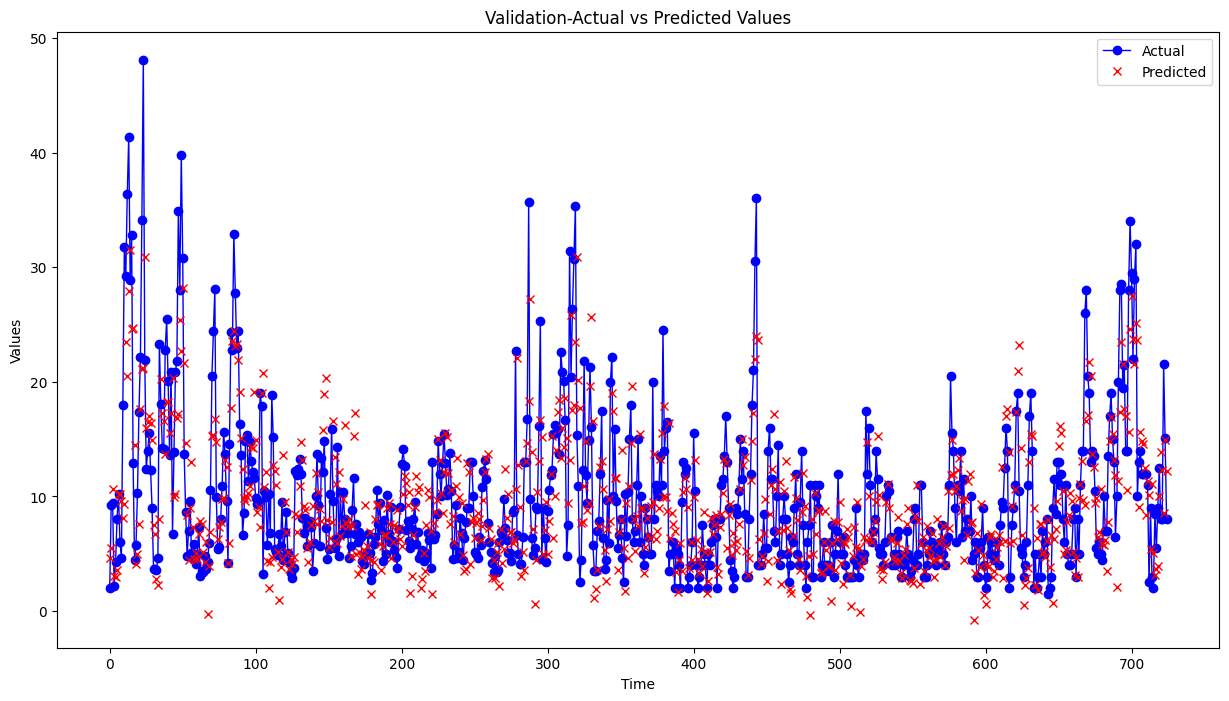

MAE: 3.7972
MSE: 27.4378
RMSE: 5.2381
MAPE: 0.7734
Bias: 0.3499
MASE: 1.1319977875879488
23/23 [==============================] - 0s 3ms/step


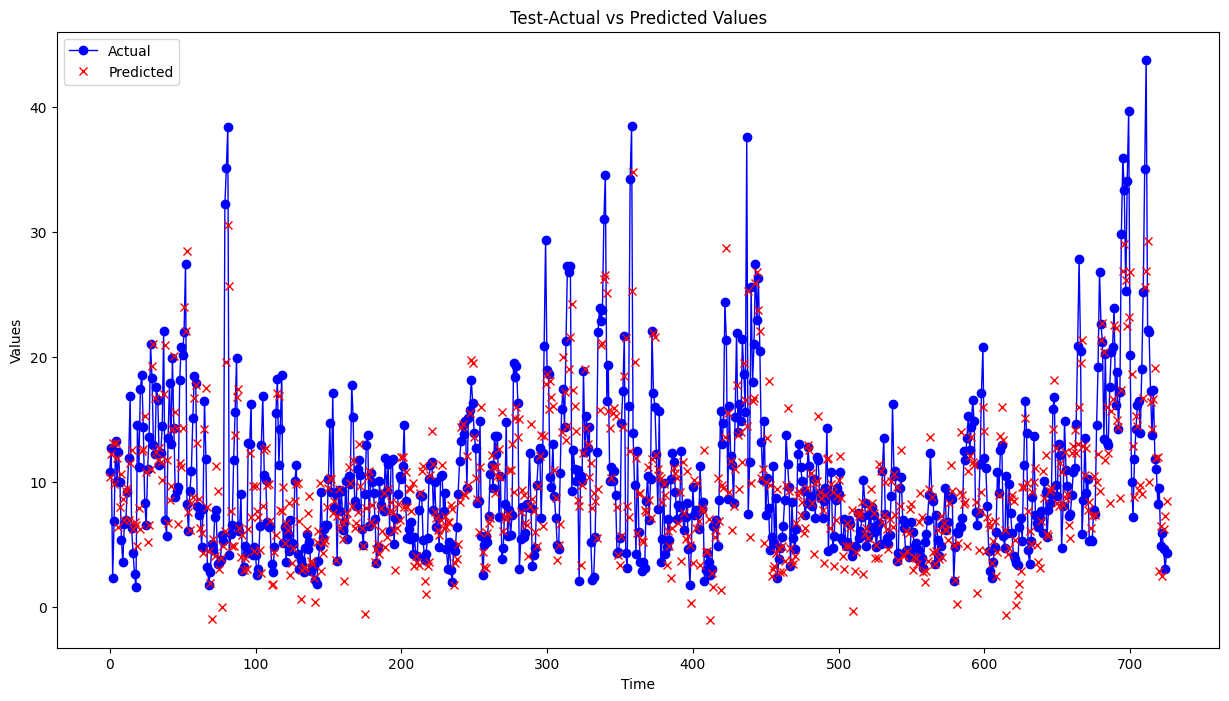

MAE: 3.7485
MSE: 26.8453
RMSE: 5.1812
MAPE: 1.3701
Bias: 0.6974
MASE: 1.1390998327959236
Model saved to cnn_model_D.pkl
{'Total Data Points': 522, 'Training Data Size': 298, 'Validation Data Size': 99, 'Testing Data Size': 100}
{'learning_rate': 0.0031087381681937547, 'num_layers': 4, 'units': [96, 32, 96, 96], 'activations': ['tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.1985 - mean_absolute_error: 0.3430INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 1s 64ms/step - loss: 0.1985 - mean_absolute_error: 0.3430 - val_loss: 0.0543 - val_mean_absolute_error: 0.1870
Epoch 2/10
 7/10 [====================>.........] - ETA: 0s - loss: 0.0656 - mean_absolute_error: 0.2019INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 45ms/step - loss: 0.0622 - mean_absolute_error: 0.1966 - val_loss: 0.0356 - val_mean_absolute_error: 0.1528
Epoch 3/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0400 - mean_absolute_error: 0.1589INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 45ms/step - loss: 0.0398 - mean_absolute_error: 0.1584 - val_loss: 0.0293 - val_mean_absolute_error: 0.1265
Epoch 4/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0269 - mean_absolute_error: 0.1288INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 42ms/step - loss: 0.0273 - mean_absolute_error: 0.1292 - val_loss: 0.0206 - val_mean_absolute_error: 0.1061
Epoch 5/10
 9/10 [==========================>...] - ETA: 0s - loss: 0.0206 - mean_absolute_error: 0.1107INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 43ms/step - loss: 0.0206 - mean_absolute_error: 0.1108 - val_loss: 0.0185 - val_mean_absolute_error: 0.1000
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.0178 - mean_absolute_error: 0.1012INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 1s 65ms/step - loss: 0.0178 - mean_absolute_error: 0.1012 - val_loss: 0.0171 - val_mean_absolute_error: 0.0947
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.0167 - mean_absolute_error: 0.0984 - val_loss: 0.0180 - val_mean_absolute_error: 0.1004
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.0142 - mean_absolute_error: 0.0903INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 42ms/step - loss: 0.0142 - mean_absolute_error: 0.0903 - val_loss: 0.0167 - val_mean_absolute_error: 0.0933
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.0138 - mean_absolute_error: 0.0889INFO:tensorflow:Assets written to: cnn_model_W/assets


INFO:tensorflow:Assets written to: cnn_model_W/assets


10/10 [==============================] - 0s 41ms/step - loss: 0.0138 - mean_absolute_error: 0.0889 - val_loss: 0.0161 - val_mean_absolute_error: 0.0893
Epoch 10/10
4/4 [==============================] - 0s 5ms/step


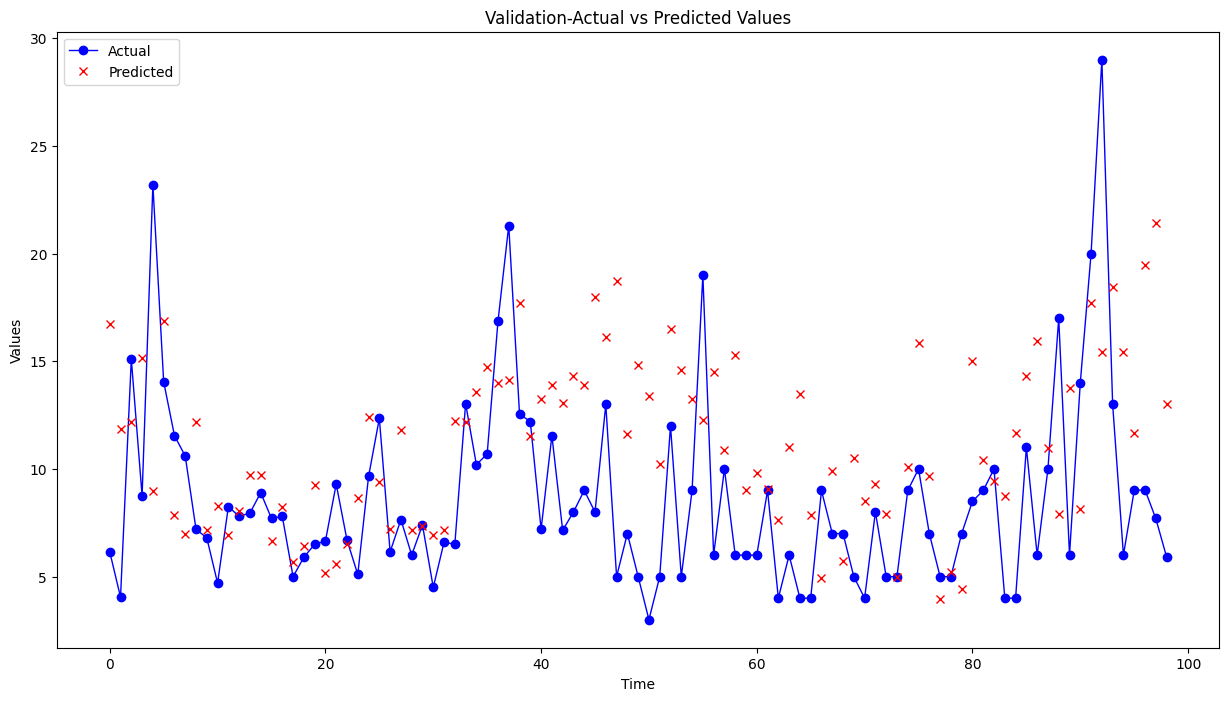

MAE: 4.4238
MSE: 31.7068
RMSE: 5.6309
MAPE: 0.3755
Bias: -2.5291
MASE: 1.4199540555843844
4/4 [==============================] - 0s 6ms/step


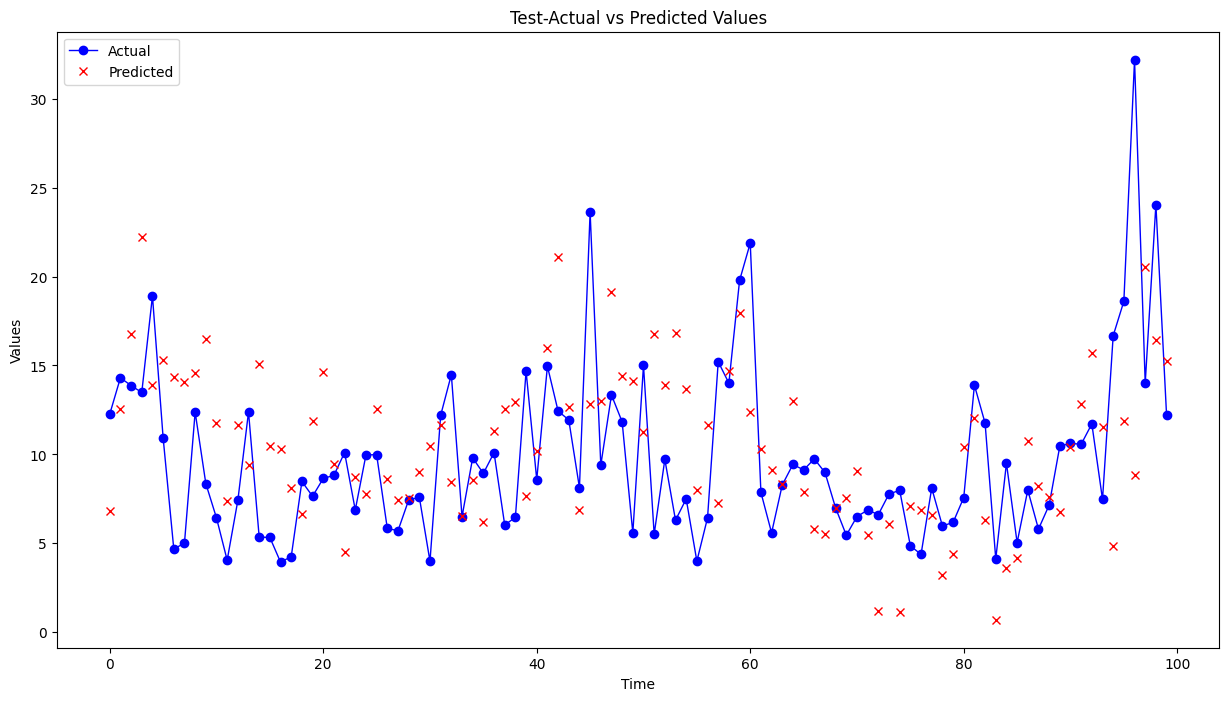

MAE: 4.2546
MSE: 29.8802
RMSE: 5.4663
MAPE: 0.5691
Bias: -0.6857
MASE: 1.2473021417145846
Model saved to cnn_model_W.pkl
{'Total Data Points': 120, 'Training Data Size': 64, 'Validation Data Size': 21, 'Testing Data Size': 22}
{'learning_rate': 0.0009974518412524185, 'num_layers': 5, 'units': [64, 448, 256, 64, 416], 'activations': ['relu', 'tanh', 'tanh', 'tanh', 'tanh', 'tanh'], 'dropout': True}
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.2668 - mean_absolute_error: 0.4303INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 1s 497ms/step - loss: 0.1981 - mean_absolute_error: 0.3633 - val_loss: 0.0841 - val_mean_absolute_error: 0.2299
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0939 - mean_absolute_error: 0.2478INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 379ms/step - loss: 0.0823 - mean_absolute_error: 0.2245 - val_loss: 0.0464 - val_mean_absolute_error: 0.1696
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0696 - mean_absolute_error: 0.2084INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 375ms/step - loss: 0.0770 - mean_absolute_error: 0.2184 - val_loss: 0.0436 - val_mean_absolute_error: 0.1666
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0630 - mean_absolute_error: 0.1976INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 1s 550ms/step - loss: 0.0574 - mean_absolute_error: 0.1898 - val_loss: 0.0351 - val_mean_absolute_error: 0.1513
Epoch 5/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.1722 - val_loss: 0.0445 - val_mean_absolute_error: 0.1687
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0507 - mean_absolute_error: 0.1826INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 363ms/step - loss: 0.0473 - mean_absolute_error: 0.1750 - val_loss: 0.0295 - val_mean_absolute_error: 0.1322
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.0331 - mean_absolute_error: 0.1438 - val_loss: 0.0313 - val_mean_absolute_error: 0.1376
Epoch 8/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0345 - mean_absolute_error: 0.1504INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 377ms/step - loss: 0.0362 - mean_absolute_error: 0.1523 - val_loss: 0.0289 - val_mean_absolute_error: 0.1301
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0310 - mean_absolute_error: 0.1343INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


2/2 [==============================] - 0s 385ms/step - loss: 0.0321 - mean_absolute_error: 0.1379 - val_loss: 0.0254 - val_mean_absolute_error: 0.1226
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - mean_absolute_error: 0.1341INFO:tensorflow:Assets written to: cnn_model_M/assets


INFO:tensorflow:Assets written to: cnn_model_M/assets


1/1 [==============================] - 0s 43ms/step


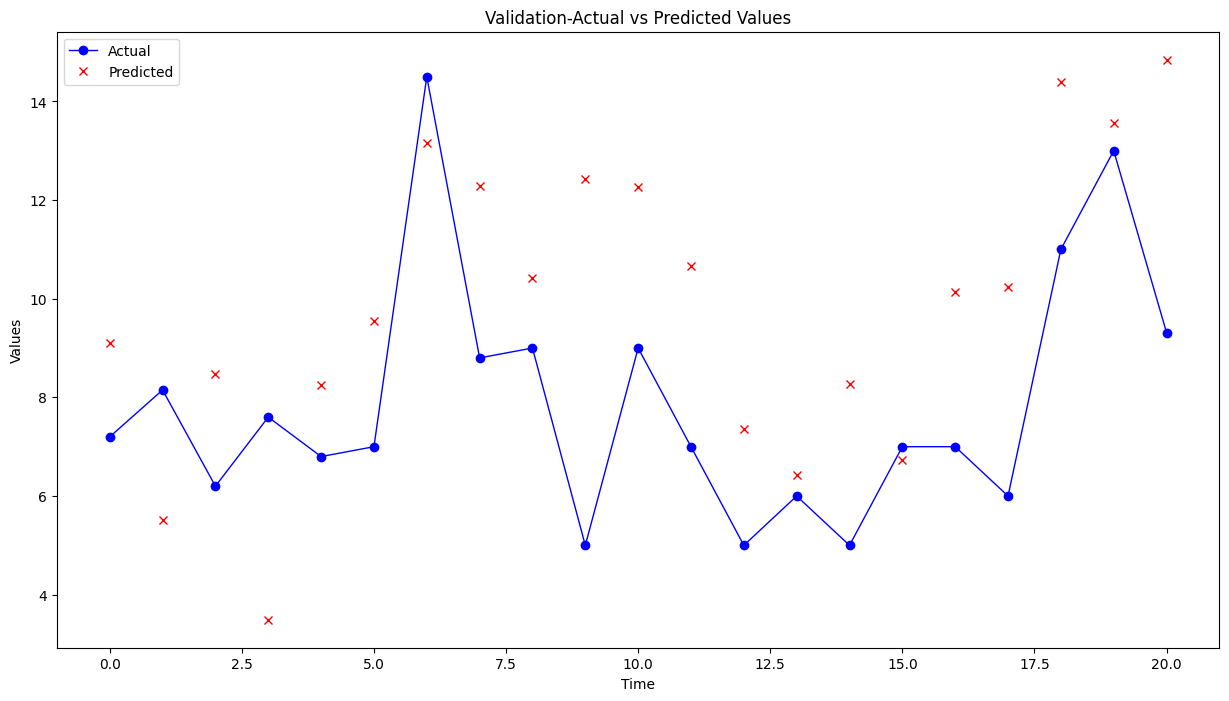

MAE: 2.7940
MSE: 10.6170
RMSE: 3.2584
MAPE: 0.3093
Bias: -1.9994
MASE: 1.2404015642306812
1/1 [==============================] - 0s 27ms/step


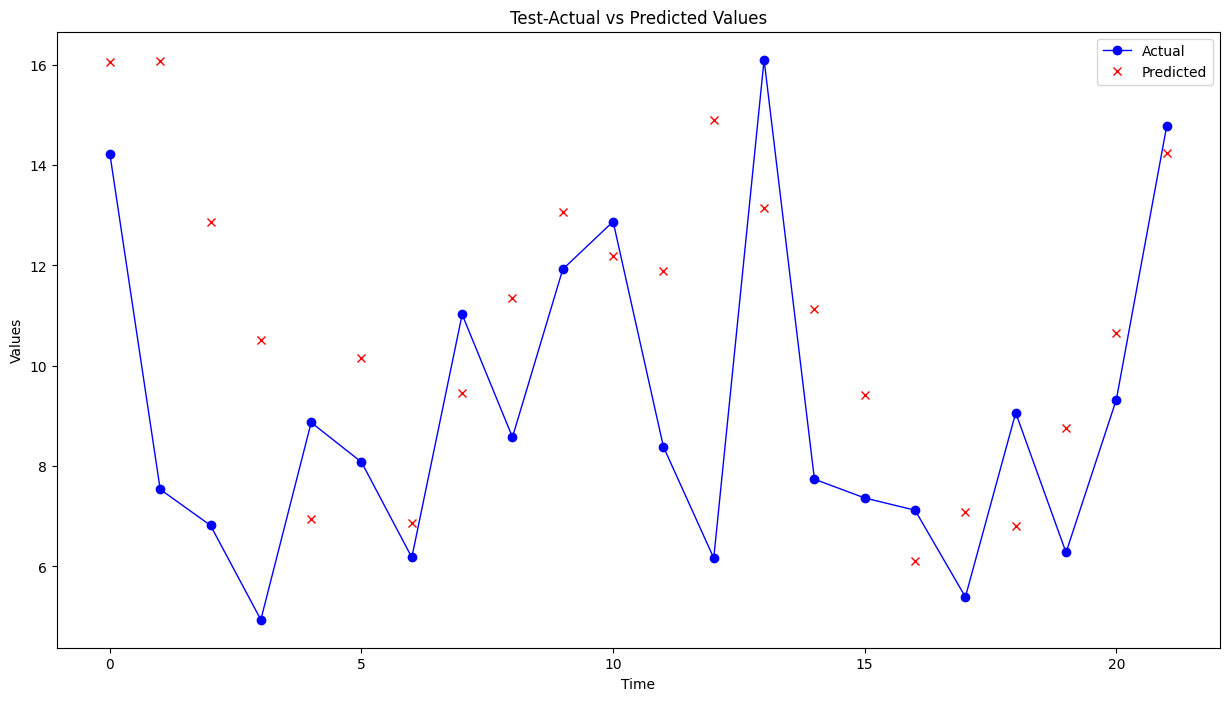

MAE: 2.8533
MSE: 13.3833
RMSE: 3.6583
MAPE: 0.2541
Bias: -1.8582
MASE: 1.375356427179469
Model saved to cnn_model_M.pkl


In [8]:
# Train and Evolve

# Hourly
dl.cnn_train_and_evaluate(df_hourly)

# Daily
dl.cnn_train_and_evaluate(df_daily, 'D')

# Weekly
dl.cnn_train_and_evaluate(df_weekly, 'W')

# Monthly
dl.cnn_train_and_evaluate(df_monthly, 'M')

# Hyperparameter Tuning

## HOURLY

In [9]:
# HOURLY HYPERPARAMETER TUNING

# hourly_dnn_best_model, hourly_dnn_best_hp = dl.dnn_tune_and_evolve(df_hourly)
# hourly_lstm_best_model, hourly_lstm_best_hp = dl.lstm_tune_and_evolve(df_hourly)
# hourly_cnn_best_model, hourly_cnn_best_hp = dl.cnn_tune_and_evolve(df_hourly)

## DAILY

In [10]:
# DAILY HYPERPARAMETER TUNING

# daily_dnn_best_model, daily_dnn_best_hp = dl.dnn_tune_and_evolve(df_daily, 'D')
# daily_lstm_best_model, daily_lstm_best_hp = dl.lstm_tune_and_evolve(df_daily, 'D')
# daily_cnn_best_model, daily_cnn_best_hp = dl.cnn_tune_and_evolve(df_daily, 'D')

## WEEKLY

In [11]:
# WEEKLY HYPERPARAMETER TUNING

# weekly_dnn_best_model, weekly_dnn_best_hp = dl.dnn_tune_and_evolve(df_weekly, 'W')
# weekly_lstm_best_model, weekly_lstm_best_hp = dl.lstm_tune_and_evolve(df_weekly, 'W')
# weekly_cnn_best_model, weekly_cnn_best_hp = dl.cnn_tune_and_evolve(df_weekly, 'W')

## MONTHLY

In [12]:
# MONTHLY HYPERPARAMETER TUNING

# monthly_dnn_best_model, monthly_dnn_best_hp = dl.dnn_tune_and_evolve(df_monthly, 'M')
# monthly_lstm_best_model, monthly_lstm_best_hp = dl.lstm_tune_and_evolve(df_monthly, 'M')
# monthly_cnn_best_model, monthly_cnn_best_hp = dl.cnn_tune_and_evolve(df_monthly, 'M')